## ¿Cuál es la distribución de subastas por hora? ¿Pertenecen en mayor medida a Android o iOS?

In [3]:
import pandas as pd
import numpy as np

auctions_dtypes = {'auction_type_id': np.float16, 'country': 'category', 'platform': 'category',
                   'ref_type_id': 'category', 'source_id': 'category', 'device_id': 'category'}

auctions = pd.read_csv('auctions.csv', dtype = auctions_dtypes)

auctions.drop('auction_type_id', axis = 1, inplace = True)  #todas Nan

auctions["date"] =  pd.to_datetime(auctions["date"], errors = "coerce")

In [6]:
auctions['cant_subastas'] = 1
auctions['hora'] = auctions['date'].dt.hour

In [35]:
group_auctions = auctions.groupby(['hora','platform']).agg({'cant_subastas':'count'})

In [38]:
subastas_por_hora = group_auctions.unstack().cant_subastas

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
colors = ["#006D2C","#74C476"]

Text(0, 0.5, 'Cantidad de subastas')

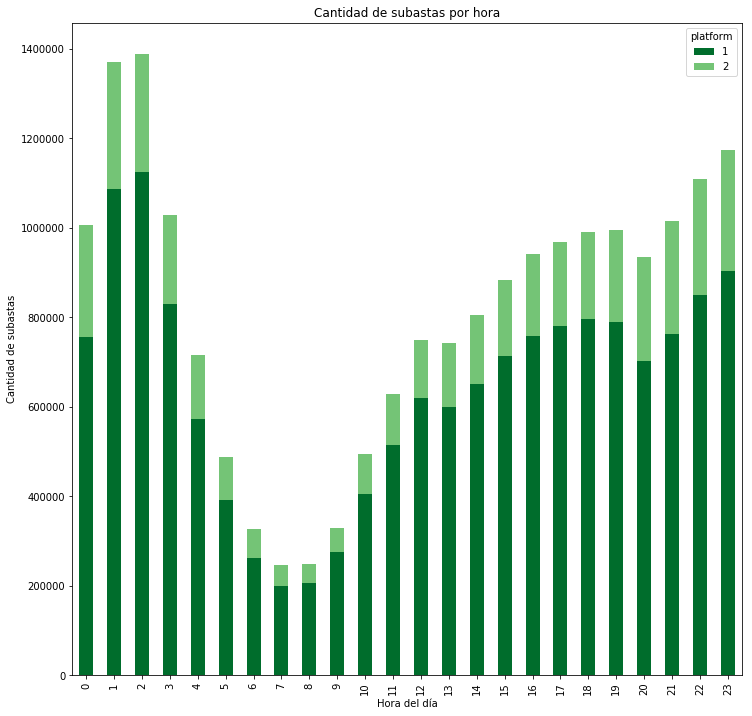

In [65]:
plot = subastas_por_hora.plot.bar(stacked=True, color=colors, figsize=(12,12), title = "Cantidad de subastas por hora")
plot.set_xlabel("Hora del día")
plot.set_ylabel("Cantidad de subastas")